The goal of collecting the Heart Failure Prediction dataset is to raise awareness about the risk factors of the heart failure. 
 People with cardiovascular disease or who are at high cardiovascular risk
 (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease)
 need early detection and management where in a machine learning model can be of great help.


 Attribute Information:Age , Sex , ChestPainType , RestingBP , Cholesterol , FastingBS ,
 RestingECG , MaxHR , ExerciseAngina , HeartDisease
 Link: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download

In [293]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, PowerTransformer, FunctionTransformer
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
from sklearn.preprocessing import LabelEncoder

#Data Scaling libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

#libraries for tests
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#DT libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import auc
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



In [248]:
# retrive number of rows and columns
data_df = pd.read_csv('heart.csv' , index_col=0)
data_df

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,,,,,,,,,,,
40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
45,M,TA,110,264,0,Normal,132,N,1.20,Flat,1
68,M,ASY,144,193,1,Normal,141,N,3.40,Flat,1
57,M,ASY,130,131,0,Normal,115,Y,1.20,Flat,1


In [249]:
# first 5 rows
data_df.head()

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,,,,,,,,,,,
40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [250]:
# Get the number of rows and columns
num_rows = data_df.shape[0]
num_cols = data_df.shape[1]

# Print the results
print('Number of rows:', num_rows)
print('Number of columns:', num_cols)

Number of rows: 918
Number of columns: 11


In [251]:
# display the variables type for each column
data_df.dtypes

Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [252]:
#Count the number of variables
num_variables = len(data_df.columns)

#print number of variables
print("Number of variables:" , num_variables )

Number of variables: 11


In [253]:
# display the statistical summaries
data_df.describe()

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00
mean,132.40,198.80,0.23,136.81,0.89,0.55
std,18.51,109.38,0.42,25.46,1.07,0.50
min,0.00,0.00,0.00,60.00,-2.60,0.00
25%,120.00,173.25,0.00,120.00,0.00,0.00
50%,130.00,223.00,0.00,138.00,0.60,1.00
75%,140.00,267.00,0.00,156.00,1.50,1.00
max,200.00,603.00,1.00,202.00,6.20,1.00


In [254]:
# Remove non-numeric columns
numeric_df = data_df.select_dtypes(include=['float64', 'int64'])

# Display the variance of each column
print(numeric_df.var())

RestingBP        342.77
Cholesterol    11964.89
FastingBS          0.18
MaxHR            648.23
Oldpeak            1.14
HeartDisease       0.25
dtype: float64


In [255]:
# Get the labels from the dataset
labels = data_df

# Display the labels
print(labels)

    Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR   
Age                                                                          
40    M           ATA        140          289          0     Normal    172  \
49    F           NAP        160          180          0     Normal    156   
37    M           ATA        130          283          0         ST     98   
48    F           ASY        138          214          0     Normal    108   
54    M           NAP        150          195          0     Normal    122   
..   ..           ...        ...          ...        ...        ...    ...   
45    M            TA        110          264          0     Normal    132   
68    M           ASY        144          193          1     Normal    141   
57    M           ASY        130          131          0     Normal    115   
57    F           ATA        130          236          0        LVH    174   
38    M           NAP        138          175          0     Nor

In [256]:
# Get the first 5 rows of raw data
raw_data = data_df.head()

# Display the raw data
print(raw_data)

    Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR   
Age                                                                          
40    M           ATA        140          289          0     Normal    172  \
49    F           NAP        160          180          0     Normal    156   
37    M           ATA        130          283          0         ST     98   
48    F           ASY        138          214          0     Normal    108   
54    M           NAP        150          195          0     Normal    122   

    ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
Age                                                 
40               N     0.00       Up             0  
49               N     1.00     Flat             1  
37               N     0.00       Up             0  
48               Y     1.50     Flat             1  
54               N     0.00       Up             0  


In [257]:
data_df.sample(3)

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,,,,,,,,,,,
52,M,ASY,130,225,0,Normal,120,Y,2.00,Flat,1
63,F,ASY,124,197,0,Normal,136,Y,0.00,Flat,1
43,M,ASY,140,0,0,ST,140,Y,0.50,Up,1


In [258]:
# Create a crosstab of 'ChestPainType' by 'Sex'
cp_sex_ct = pd.crosstab(data_df['ChestPainType'], data_df['Sex'])

# Print the crosstab
print(cp_sex_ct)

Sex             F    M
ChestPainType         
ASY            70  426
ATA            60  113
NAP            53  150
TA             10   36


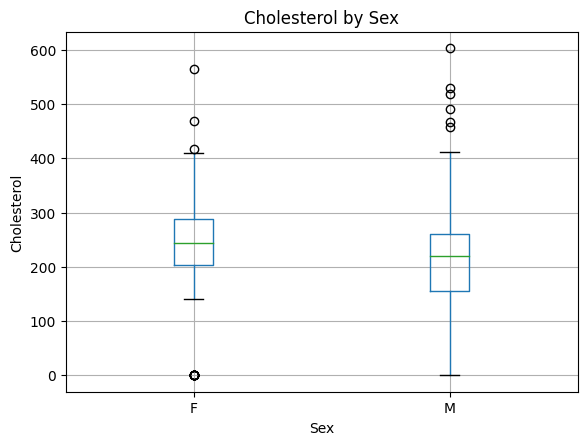

In [259]:
# Create a box plot of 'Cholesterol' by 'Sex'
data_df.boxplot(column='Cholesterol', by='Sex')
plt.xlabel('Sex')
plt.ylabel('Cholesterol')
plt.title('Cholesterol by Sex')
plt.suptitle('')
plt.show()

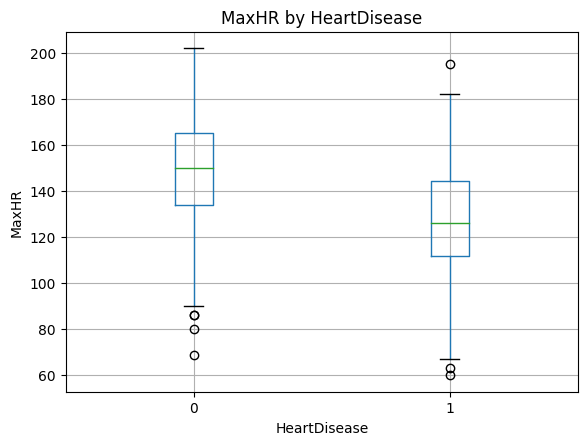

In [260]:
# Create a box plot of 'MaxHR' by 'HeartDisease'
data_df.boxplot(column='MaxHR', by='HeartDisease')
plt.xlabel('HeartDisease')
plt.ylabel('MaxHR')
plt.title('MaxHR by HeartDisease')
plt.suptitle('')
plt.show()

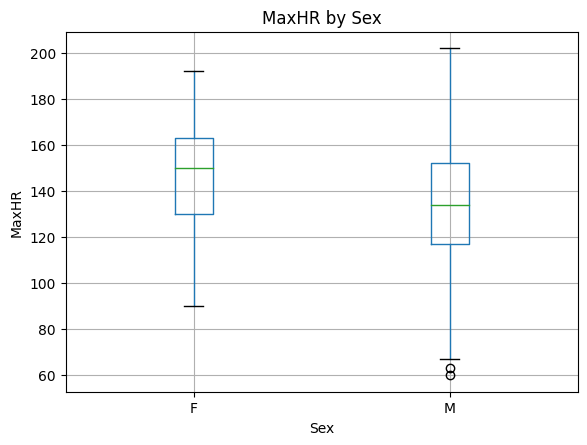

In [261]:
# Create a box plot of 'MaxHR' by 'Sex'
data_df.boxplot(column='MaxHR', by='Sex')
plt.xlabel('Sex')
plt.ylabel('MaxHR')
plt.title('MaxHR by Sex')
plt.suptitle('')
plt.show()

In [262]:
# Compute summary statistics for each variable
var_summary = data_df.describe()

# Display the summary statistics as a table
print(var_summary)

       RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
count     918.00       918.00     918.00 918.00   918.00        918.00
mean      132.40       198.80       0.23 136.81     0.89          0.55
std        18.51       109.38       0.42  25.46     1.07          0.50
min         0.00         0.00       0.00  60.00    -2.60          0.00
25%       120.00       173.25       0.00 120.00     0.00          0.00
50%       130.00       223.00       0.00 138.00     0.60          1.00
75%       140.00       267.00       0.00 156.00     1.50          1.00
max       200.00       603.00       1.00 202.00     6.20          1.00


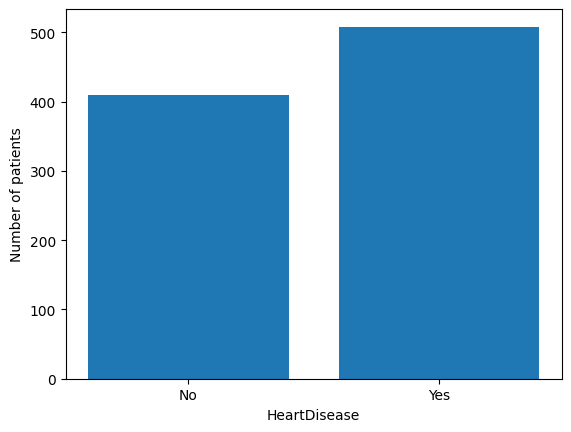

In [263]:
#Compute the number of patients with and without HeartDisease
diabetes_counts = data_df['HeartDisease'].value_counts()

# Create a bar chart of the diabetes data
plt.bar(diabetes_counts.index, diabetes_counts.values)
plt.xlabel('HeartDisease')
plt.ylabel('Number of patients')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

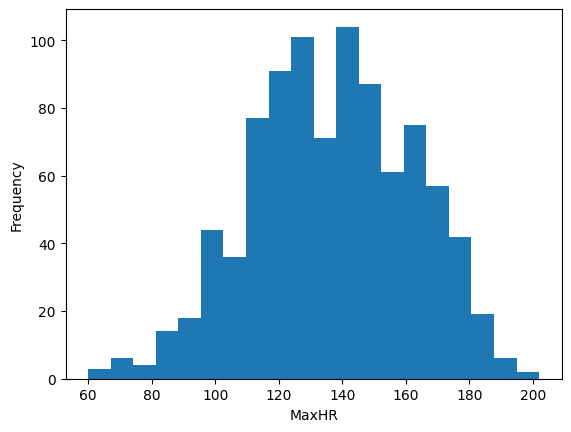

In [264]:
# Create a histogram of the MaxHR data
plt.hist(data_df['MaxHR'], bins=20)
plt.xlabel('MaxHR')
plt.ylabel('Frequency')
plt.show()

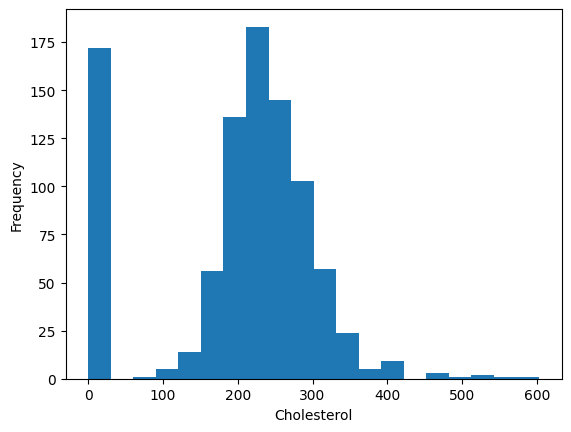

In [265]:
# Create a histogram of the Cholesterol data
plt.hist(data_df['Cholesterol'], bins=20)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

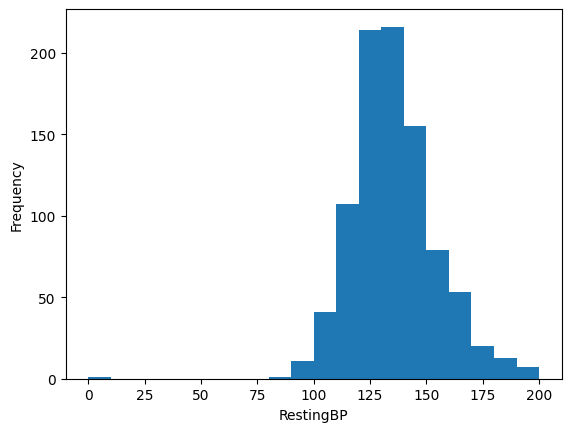

In [266]:
# Create a histogram of the RestingBP data
plt.hist(data_df['RestingBP'], bins=20)
plt.xlabel('RestingBP')
plt.ylabel('Frequency')
plt.show()

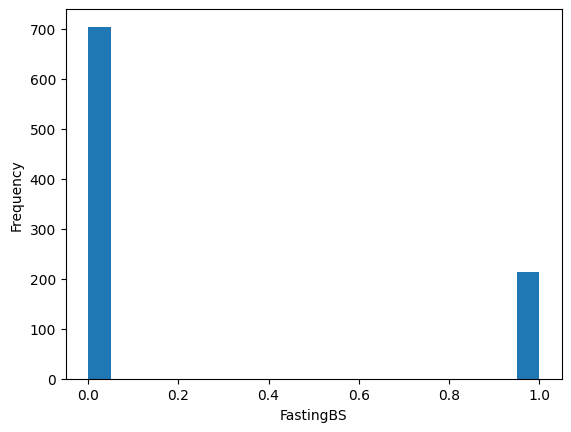

In [267]:
# Create a histogram of the FastingBS data
plt.hist(data_df['FastingBS'], bins=20)
plt.xlabel('FastingBS')
plt.ylabel('Frequency')
plt.show()

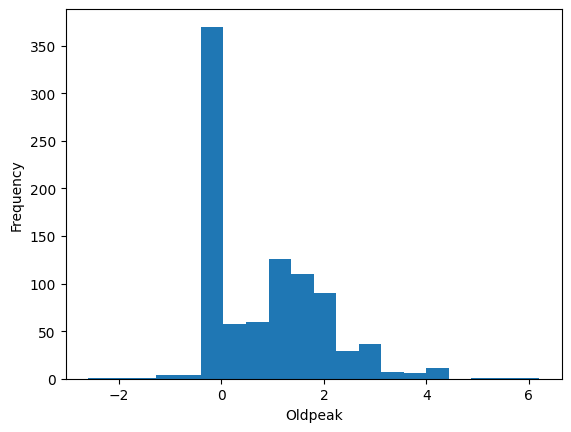

In [268]:
# Create a histogram of the Oldpeak data
plt.hist(data_df['Oldpeak'], bins=20)
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.show()

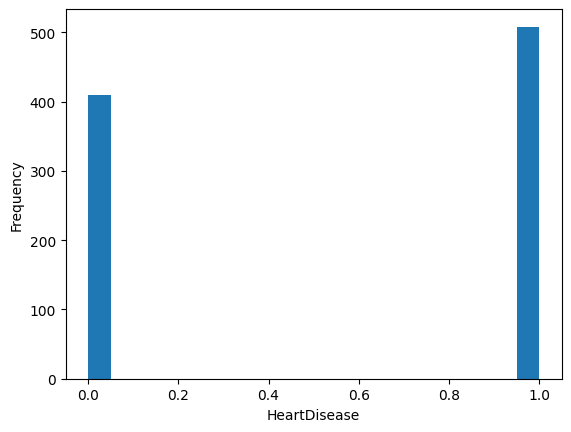

In [269]:
# Create a histogram of the HeartDisease data
plt.hist(data_df['HeartDisease'], bins=20)
plt.xlabel('HeartDisease')
plt.ylabel('Frequency')
plt.show()

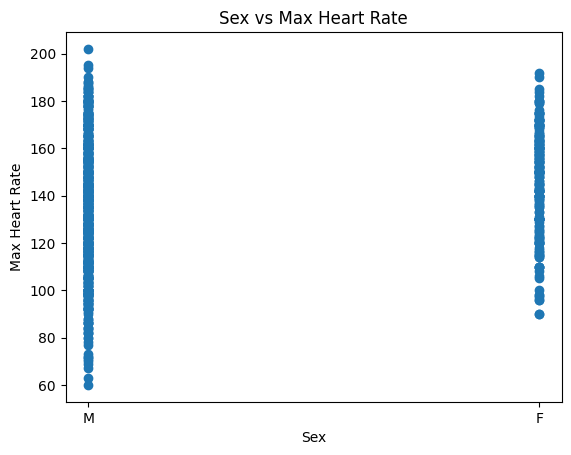

In [270]:
# Create a scatter plot of 'Sex' vs 'MaxHR'
plt.scatter(data_df['Sex'], data_df['MaxHR'])
plt.xlabel('Sex')
plt.ylabel('Max Heart Rate')
plt.title('Sex vs Max Heart Rate')
plt.show()

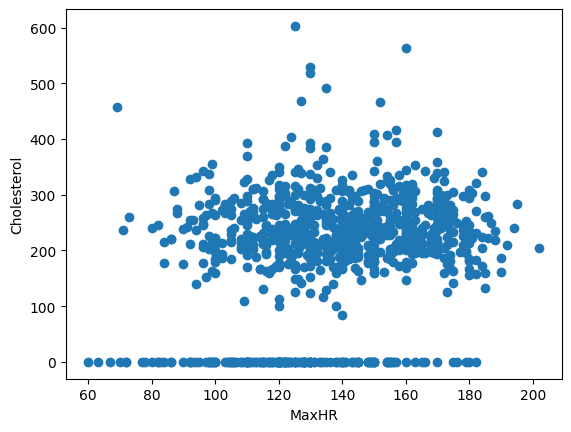

In [271]:
# Create a scatter plot of MaxHR vs. Cholesterol
plt.scatter(data_df['MaxHR'], data_df['Cholesterol'])
plt.xlabel('MaxHR')
plt.ylabel('Cholesterol')
plt.show()

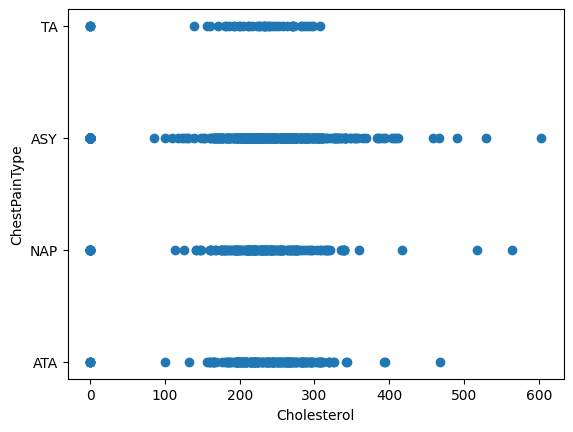

In [272]:
# Create a scatter plot of Cholesterol vs. ChestPainType
plt.scatter(data_df['Cholesterol'], data_df['ChestPainType'])
plt.xlabel('Cholesterol')
plt.ylabel('ChestPainType')
plt.show()

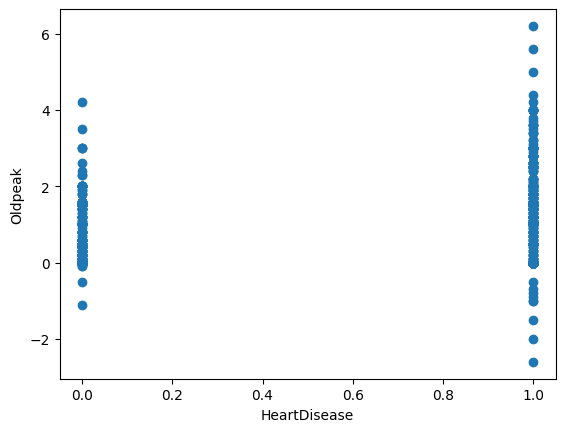

In [273]:
# Create a scatter plot of HeartDisease vs. Oldpeak
plt.scatter(data_df['HeartDisease'], data_df['Oldpeak'])
plt.xlabel('HeartDisease')
plt.ylabel('Oldpeak')
plt.show()

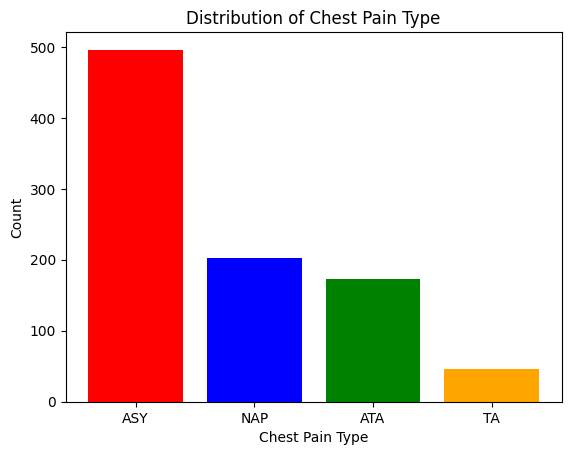

In [274]:
# Count the number of occurrences of each value in the 'ChestPainType' column
cp_counts = data_df['ChestPainType'].value_counts()

# Define a list of colors for the bars
colors = ['red', 'blue', 'green', 'orange']

# Create a bar plot of the 'ChestPainType' counts with different colors for each bar
plt.bar(cp_counts.index, cp_counts.values, color=colors)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Type')
plt.show()

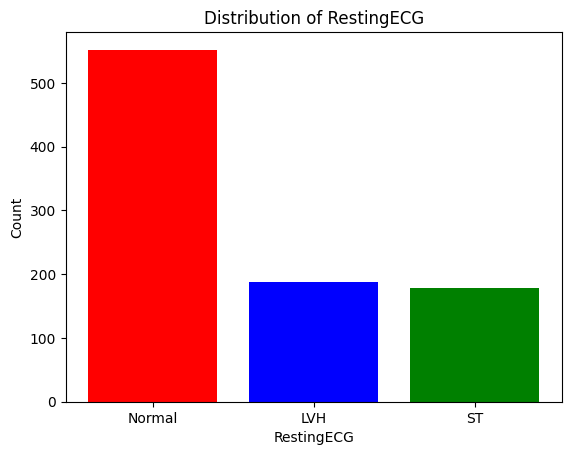

In [275]:
# Count the number of occurrences of each value in the 'RestingECG' column
cp_counts = data_df['RestingECG'].value_counts()

# Define a list of colors for the bars
colors = ['red', 'blue', 'green']

# Create a bar plot of the 'RestingECG' counts with different colors for each bar
plt.bar(cp_counts.index, cp_counts.values, color=colors)
plt.xlabel('RestingECG')
plt.ylabel('Count')
plt.title('Distribution of RestingECG')
plt.show()

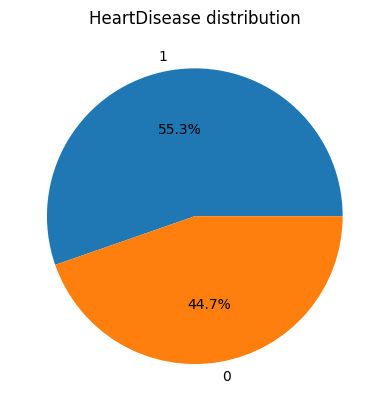

In [276]:
# Compute the number of male and female patients
HeartDisease_counts = data_df['HeartDisease'].value_counts()

# Create a pie chart of the sex data
plt.pie(HeartDisease_counts.values, labels=HeartDisease_counts.index, autopct='%1.1f%%')
plt.title('HeartDisease distribution')
plt.show()

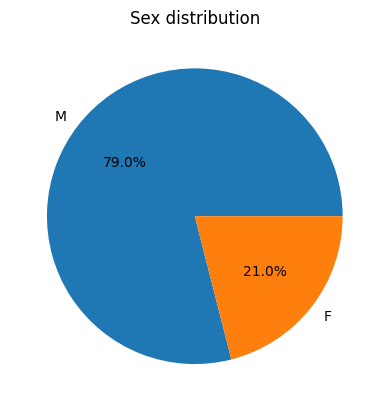

In [277]:
# Compute the number of male and female patients
sex_counts = data_df['Sex'].value_counts()

# Create a pie chart of the sex data
plt.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Sex distribution')
plt.show()

In [278]:
# Display the number of missing values in each column
print(data_df.isnull().sum())

Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [279]:
# Compute the mean of the 'RestingBP' column
rb_mean = data_df['RestingBP'].mean()
ch_mean = data_df['Cholesterol'].mean()
fa_mean = data_df['FastingBS'].mean()
mh_mean = data_df['MaxHR'].mean()

# Print the result
print("The average value of the 'RestingBP' column is:", rb_mean)
print("The average value of the 'Cholesterol' column is:", ch_mean)
print("The average value of the 'FastingBS' column is:", fa_mean)
print("The average value of the 'MaxHR' column is:", mh_mean)

The average value of the 'RestingBP' column is: 132.39651416122004
The average value of the 'Cholesterol' column is: 198.7995642701525
The average value of the 'FastingBS' column is: 0.23311546840958605
The average value of the 'MaxHR' column is: 136.80936819172112


In [280]:
# Compute the standard deviation of the 'RestingBP' column
rb_std = data_df['RestingBP'].std()
ch_std = data_df['Cholesterol'].std()
fa_std = data_df['FastingBS'].std()
mh_std = data_df['MaxHR'].std()

# Print the result
print("The standard deviation of the 'RestingBP' column is:", rb_std)
print("The standard deviation of the 'Cholesterol' column is:", ch_std)
print("The standard deviation of the 'FastingBS' column is:", fa_std)
print("The standard deviation of the 'MaxHR' column is:", mh_std)

The standard deviation of the 'RestingBP' column is: 18.5141541199078
The standard deviation of the 'Cholesterol' column is: 109.38414455220348
The standard deviation of the 'FastingBS' column is: 0.423045624739303
The standard deviation of the 'MaxHR' column is: 25.4603341382503


In [281]:
col = list(data_df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data_df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : RestingBP Cholesterol MaxHR Oldpeak


Dividing features into Numerical and Categorical 

In [282]:
le = LabelEncoder()
df1 = data_df.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

*Creating a deep copy of the orginal dataset and label encoding the text data of the categorical features. 
*Modifications in the original dataset will not be highlighted in this deep copy. 
*Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.

In [283]:
#Data Scaling
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
#df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,,,,,,,,,,,
40,1,1,0.41,0.83,0,1,1.38,0,0.30,2,0
49,0,2,1.49,-0.17,0,1,0.75,0,0.41,1,1
37,1,1,-0.13,0.77,0,2,-1.53,0,0.30,2,0
48,0,0,0.30,0.14,0,1,-1.13,1,0.47,1,1
54,1,2,0.95,-0.03,0,1,-0.58,0,0.30,2,0


Machine learning model does not understand the units of the values of the features. 
Thus, it becomes necessary to scale the data.

We have 2 options for data scaling : 
1) Normalization
2) Standardization.
Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed 
Normalization : Oldpeak feature is normalized as it had displayed a right skewed data distribution.
Standardizarion : Age, RestingBP, Cholesterol and MaxHR features are scaled down because these features are normally distributed.

*NOT* we corrected the code in phase1  of the normalization and standrization with this code

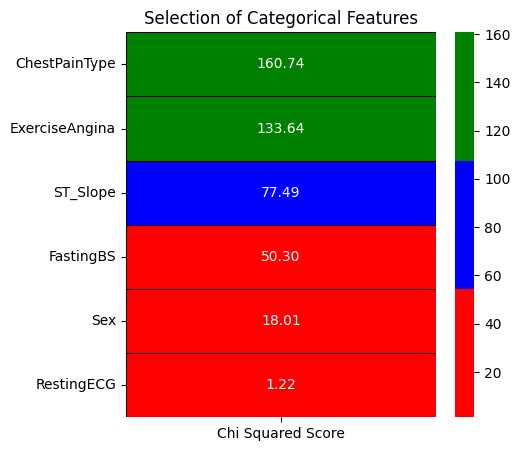

In [284]:
#Feature Selection for Categorical Features (Tests)
# Chi Squared Test 

features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

Except RestingECG, all the remaining categorical features are pretty important for predicting heart diseases

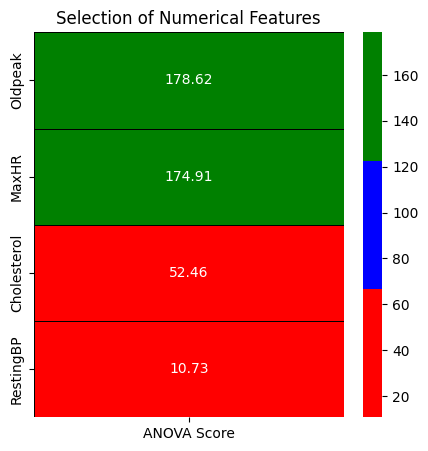

In [285]:
# Feature Selection for Numerical Features :
#ANOVA Test 
features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

We will leave out RestingBP from the modeling part and take the remaining features.

In [286]:
features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

Selecting the features from the above conducted tests and splitting the data into 80 - 20 train - test groups. 
WE eleminated the restingBp and RestingECG based on the ANOVA and Chi tests


In [308]:
def classfierFunc(classifier):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    roc_curve(prediction,y_test)
    #roc_auc = auc(v)
    s, v, _ = roc_curve(prediction,y_test)
    roc_auc = auc(s, v)
    
  
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title('ROC_AUC_Plot')
    plt.plot(s, v, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.show()

def modelTest(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

Models calssifier methods 

Accuracy :  86.96%
Cross Validation Score :  91.15%
ROC_AUC Score :  86.91%


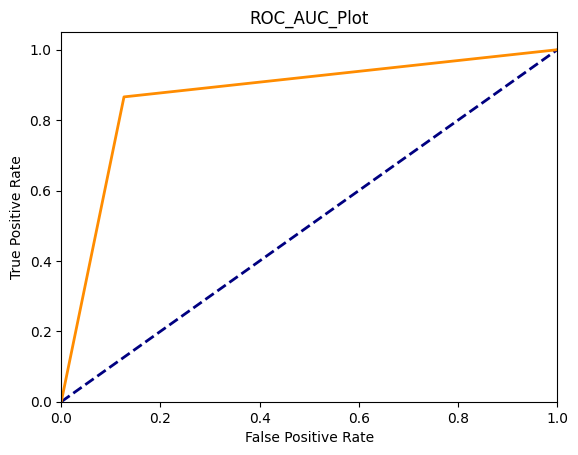

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        89
           1       0.87      0.88      0.87        95

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



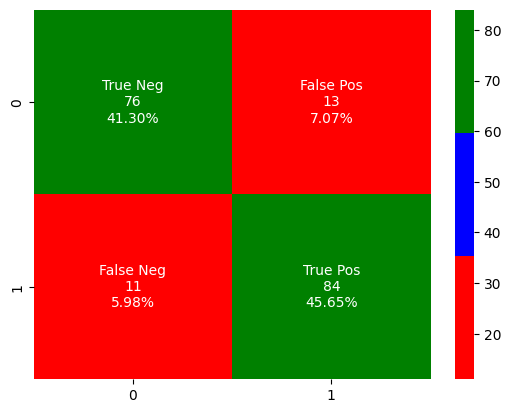

In [309]:
# 1- Logistic regresstion

classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')
classfierFunc(classifier_lr) #sending logistic regresstion classifier
modelTest(classifier_lr)

Accuracy :  85.87%
Cross Validation Score :  90.30%
ROC_AUC Score :  85.82%


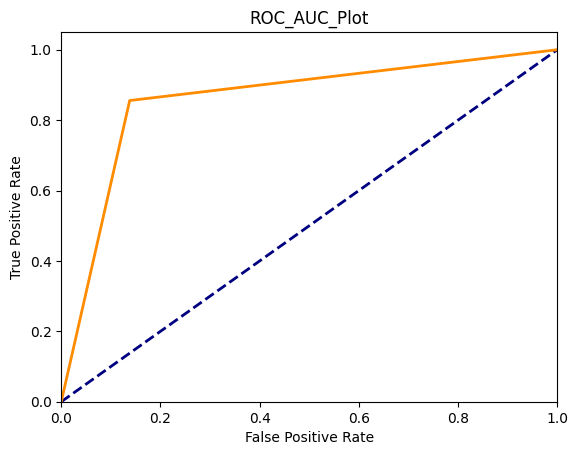

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        89
           1       0.86      0.87      0.86        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



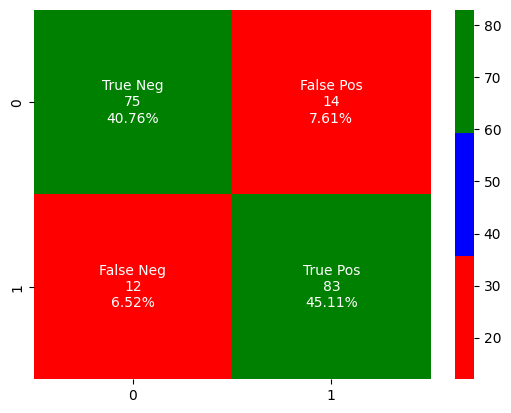

In [310]:
# 2- SVM

classifier_svc = SVC(kernel = 'linear',C = 0.1)
classfierFunc(classifier_svc)#sending SVM classifier
modelTest(classifier_svc)

Accuracy :  84.78%
Cross Validation Score :  89.18%
ROC_AUC Score :  84.62%


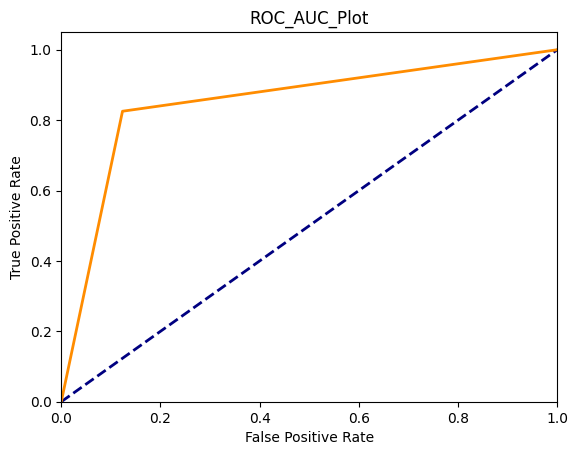

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



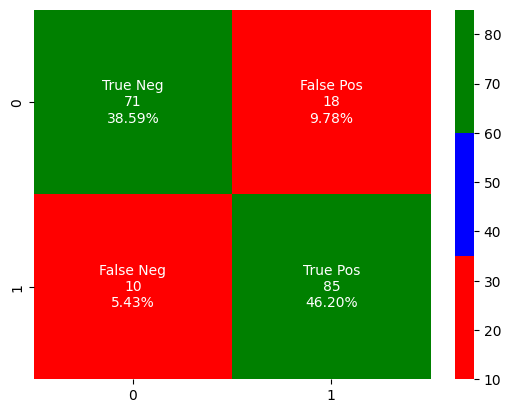

In [311]:
# 3- Decision tree
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
classfierFunc(classifier_dt)
modelTest(classifier_dt)

interpret the result : according to the accuracy and cross validation and ROC score we found that the best supervised algorithm is Logisitc regression and the worst one is the descion tree because decision trees work well with categorical features that have relatively low cardinality.